# Sharpe Ratio
The Sharpe ratio is a metric that helps quantify both the risk and the potential reward of a particular investment.
```
Sharpe Ration = (Annualized Ave. Return - Risk Free Return)/Annualized Std. Deviation
```

For our purposes, 
* the risk free option is simply holding the stable coin, which returns 0%
* the arbitrage strategy will be compared to staking stable coin


## Assumptions
* staking is risk free return alternative
* average staking reward is 2% / year
* 365 trading days / year, crypto trading is 24/7


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

## Input needed
* A representative daily return of arbitrage trading
* risk free annualized return

## Derived metrics
* Annualized Ave. return of arbitrage trading
* Annualized Standard Deviation of arbitrage trading

In [2]:
# Define trading days per year for analysis and calculations
trading_days_per_year = 365

# risk free return from assumption
staking_annualized_return = 0.02 # 2%

## Create a mock of daily return arbitrage trading

### Criteria
* mean of 0.00
* occasional deviations from mean +/- 6%
* one years worth of data

In [3]:
# create a mock return for a year's worth of data
mock_arbitrage_daily_returns = pd.Series(np.random.normal(
    loc=0,
    scale=0.018,
    size=365
))
# inspect mock arbitrage series
mock_arbitrage_daily_returns

0      0.015611
1     -0.020750
2      0.003487
3      0.032001
4      0.005908
         ...   
360    0.014111
361   -0.004131
362   -0.011471
363    0.012871
364   -0.003020
Length: 365, dtype: float64

In [4]:
# look at the summary stats for the mock arbitrage series
mock_arbitrage_daily_returns.describe()

count    365.000000
mean       0.000355
std        0.018393
min       -0.045930
25%       -0.011473
50%       -0.000164
75%        0.012871
max        0.072133
dtype: float64

mock_daily_returns series meets the initial criteria.

<AxesSubplot:title={'center':'Box Plot of Daily Returns Data - Mock Stablecoin Arbitrage'}>

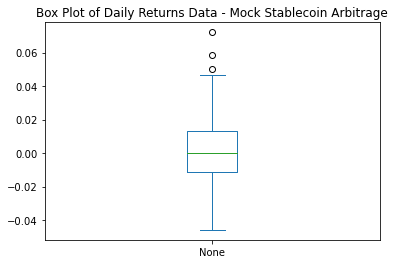

In [5]:
# Visualize Daily return summary statistics for the mock arbitrage series
mock_arbitrage_daily_returns.plot.box(title="Box Plot of Daily Returns Data - Mock Stablecoin Arbitrage")

## create a mock series for the staking option

### Criteria
* 2 % annualized return
* one years worth of data

In [6]:
# calculate the staking daily return
staking_daily_return = staking_annualized_return / trading_days_per_year

# display the staking_daily_return
print(f"staking_daily_return={staking_daily_return*100:.4f}%")

# create a mock series for the staking option
mock_staking_daily_returns = pd.Series(np.random.normal(
    loc=staking_daily_return,
    scale=staking_daily_return/3,
    size=365
))

# inspect mock series for the staking option 
mock_staking_daily_returns

staking_daily_return=0.0055%


0      0.000079
1      0.000039
2      0.000030
3      0.000071
4      0.000079
         ...   
360    0.000059
361    0.000069
362    0.000047
363    0.000051
364    0.000069
Length: 365, dtype: float64

In [7]:
# look at the summary stats for the mock staking series
mock_staking_daily_returns.describe()

count    365.000000
mean       0.000055
std        0.000019
min       -0.000032
25%        0.000042
50%        0.000055
75%        0.000066
max        0.000108
dtype: float64

<AxesSubplot:title={'center':'Box Plot of Daily Returns Data - Mock Stablecoin Arbitrage'}>

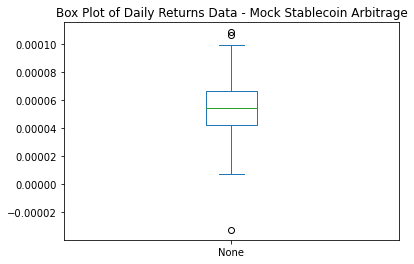

In [8]:
# Visualize daily return summary statistics for the mock staking series
mock_staking_daily_returns.plot.box(title="Box Plot of Daily Returns Data - Mock Stablecoin Arbitrage")

## Combine into a dataframe

In [9]:
returns_df = pd.DataFrame(
    {'arbitrage':mock_arbitrage_daily_returns,
     'staking':mock_staking_daily_returns
    }
)
returns_df

,arbitrage,staking
0,0.015611,0.000079
1,-0.020750,0.000039
2,0.003487,0.000030
3,0.032001,0.000071
4,0.005908,0.000079
...,...,...
360,0.014111,0.000059
361,-0.004131,0.000069
362,-0.011471,0.000047
363,0.012871,0.000051


## Calculate Annualized Ave. Return


In [10]:
# calculate the average annualized return
annualized_returns = returns_df.mean() * trading_days_per_year

# display the average annualized return
annualized_returns

arbitrage    0.129549
staking      0.019900
dtype: float64

## Calculate Annualized Standard Deviation


In [11]:
# calculate the annualized standard deviation
annual_standard_deviation = returns_df.std() * np.sqrt(trading_days_per_year)

# display the annualized standard deviation
annual_standard_deviation

arbitrage    0.351405
staking      0.000359
dtype: float64

## Calculate Sharpe Ratio


In [12]:
# calculate sharpe ratio
# Sharpe Ration = (Annualized Ave. Return - Risk Free Return)/Annualized Std. Deviatio
sharpe_ratio = (annualized_returns)/annual_standard_deviation

# display sharpe ratio
sharpe_ratio

arbitrage     0.368658
staking      55.494319
dtype: float64

<AxesSubplot:title={'center':'Risk/Reward (Sharpe Ratio) Comparison of arbitrage vs staking'}>

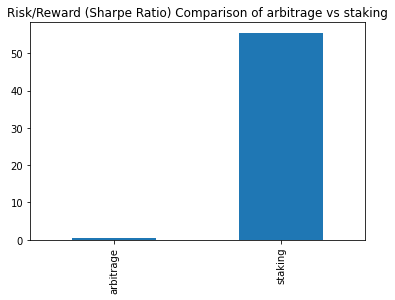

In [13]:
sharpe_ratio.plot(
    kind="bar",
    title="Risk/Reward (Sharpe Ratio) Comparison of arbitrage vs staking"
)